KeyboardInterrupt: 

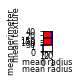

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


# Parameters
plot_step = 0.02
plot_colors = "bry"
iris = load_breast_cancer()
num_features = 30
n_classes = 2
#--
# classify and plot data
#--
plt.figure()
plt.rc( 'xtick', labelsize=8 )
plt.rc( 'ytick', labelsize=8 )
for i in range(0,num_features):
    for j in range(i+1,num_features):
        # classify using two corresponding features
        pair = [i, j]
        X = iris.data[:, pair]
        y = iris.target
        # train classifier
        clf = DecisionTreeClassifier().fit( X,  y )
        # plot the (learned) decision boundaries
        plt.subplot( num_features, num_features, j*num_features+i+1 )
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid( np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step) )
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
        plt.xlabel( iris.feature_names[pair[0]], fontsize=8 )
        plt.ylabel( iris.feature_names[pair[1]], fontsize=8 )
        plt.axis( "tight" )
        # plot the training points
        for ii, color in zip(range(n_classes), plot_colors):
            idx = np.where(y == ii)
            plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[ii],cmap=plt.cm.Paired)
        plt.axis("tight")
plt.show()


